# Evaluar físicamente nuevos usuarios de un gimnasio

Datos para calcular el grado de rendimiento con la edad y algunos datos de rendimiento del ejercicio. Saber cuanto tiempo vamos a tener que dedicar a cada usuario y en funcion de eso tener mas o menos personal contratado.


-Edad : 20 ~ 64

-Sexo : F,M

-Altura cm :

-Peso kg

-Grasa_corporal %

-Presion sanguinea Diastolica (min)

-Presión sanguinea sistólica (min)

-Fuerza de agarre

-Flexibilidad_cm

-Abdominales (numero)

-salto longitud_cm

-class : **A,B,C,D** ( A: la mas favorable) 


miguel : Hay que hacer un buen eda y probar muchos modelos diferentes
----------


# *Plan B*

*Predecir el precio de la cevada o trigo o avena. Uniendo los dataset de FAO (precio,año,pais) con precio en combustibles medio, precio de la electricidad medio y poblacion mundial*

*Reducir a los principales paises productores, eliminar paises importadores*

*precio de la electricidad/pais/año*
*precio combustible_medio/año*
*precio electricidad/pais/año*


tambien problemas para predecir ya que necesitariamos valores del futuro para predecir precio

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Datos desde Github


In [23]:
url = "https://raw.githubusercontent.com/juanmendiz/ML-JUAN/master/data/Raw/bodyPerformance.csv"

In [24]:
df = pd.read_csv(url)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [25]:
clase_sexo = {
    "M":1,
    "F":0
}

df['gender'] = df['gender'].replace(clase_sexo)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [26]:
clase_int = {
    "A":1,
    "B":2,
    "C":3,
    "D":4,
    "E":5,
   
}

df['class'] = df['class'].replace(clase_int)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [27]:
import os

In [28]:
ruta_archivo = os.path.join('../data', 'Pocesados.csv')
df.to_csv(ruta_archivo, index=False)

In [29]:
import seaborn as sns

<AxesSubplot:>

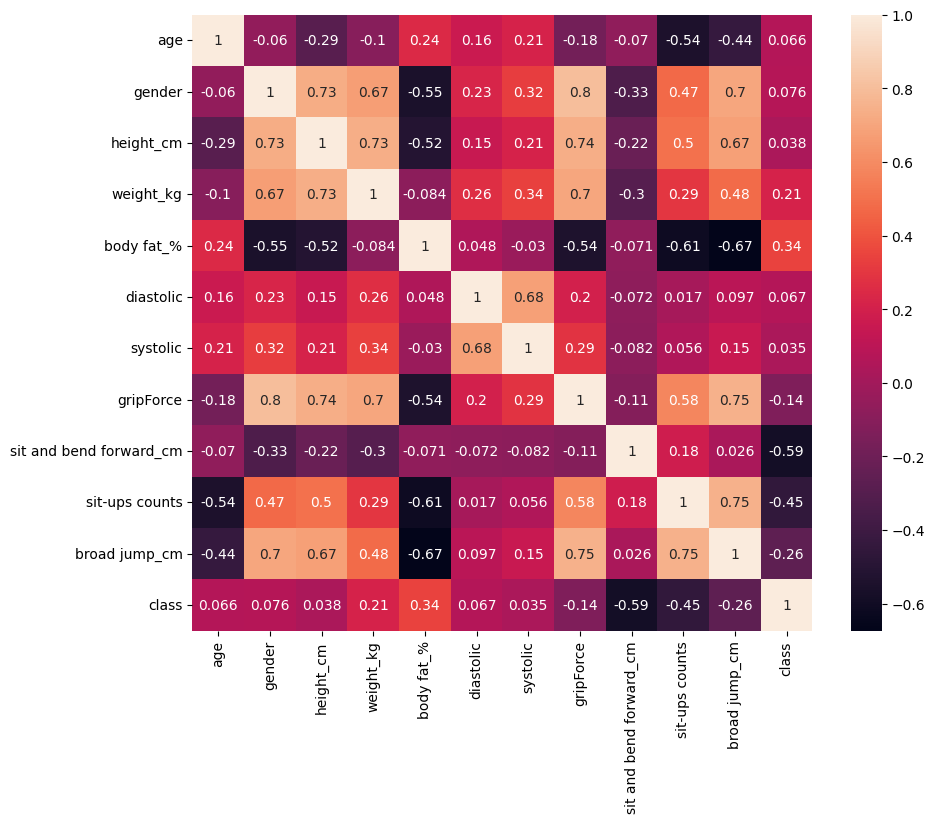

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

Predictoras y Target

In [31]:
X = df[['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']]

y = df['class']

# Scaler

In [33]:
# Lo que creo saber es que menos en los Arboles de decision siempre viene bien escalar los datos

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = X.columns
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columns)


Separacion Train y test

In [34]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X_scaled,y, test_size= 0.2, random_state=10)

In [44]:
ruta_archivo = os.path.join('../data', 'X_train.csv')
X_train.to_csv(ruta_archivo, index=False)

In [45]:
ruta_archivo = os.path.join('../data', 'y_train.csv')
y_train.to_csv(ruta_archivo, index=False)

In [46]:
ruta_archivo = os.path.join('../data', 'X_test.csv')
X_test.to_csv(ruta_archivo, index=False)

In [47]:
ruta_archivo = os.path.join('../data', 'y_test.csv')
y_test.to_csv(ruta_archivo, index=False)

In [36]:
# X_train = pd.DataFrame.to_csv('')

Funcion para Medir error, que tendré que llevarme a otra carpeta

In [37]:
# me hago una funcion que me mida el error AUC 
from sklearn.metrics import roc_auc_score

def medir_auc(nombre_modelo,y_pred):
    auc = roc_auc_score(y_test,y_pred,multi_class='ovr')
    print(f'AUC de {nombre_modelo}: ') # se le podría poner un round

# Regresion Logistica

In [38]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error

In [39]:
# me da fallo, porq es para una clasificacion binaria el roc_auc_score?

from sklearn.linear_model import LogisticRegression

rl = LogisticRegression(max_iter=1000)
rl.fit(X_train,y_train)

y_pred = rl.predict(X_test)

# medir_auc('Regresion Logistica', y_pred)
print("MSE :",mean_squared_error(y_test, y_pred))
print("MSLR :",mean_squared_log_error(y_test, y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))

MSE : 0.6550951847704367
MSLR : 0.06492559965255591
MAPE: 0.235940027373398


# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

# medir_auc('KNN ',y_pred)
print("MSE :",mean_squared_error(y_test, y_pred))
print("MSLR :",mean_squared_log_error(y_test, y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))

MSE : 0.7637178051511758
MSLR : 0.07757655297928583
MAPE: 0.23096304591265399


# Arbol de decision

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

# medir_auc('Arbol de decision' ,y_pred)
print("MSE :",mean_squared_error(y_test, y_pred))
print("MSLR :",mean_squared_log_error(y_test, y_pred))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))


MSE : 0.658454647256439
MSLR : 0.06628938797707591
MAPE: 0.2383040935672515


In [42]:
RA

NameError: name 'RA' is not defined